Model Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
GMM Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Evaluation of K-Means with Iris Dataset
Rand Index:0.730238 
Homogenity Score:0.751485 
Completeness Score:0.764986 
V-Measure:0.758176 
Evaluation of GMM with Iris Dataset
Rand Index:0.903874 
Homogenity Score:0.898326 
Completeness Score:0.901065 
V-Measure:0.899694 


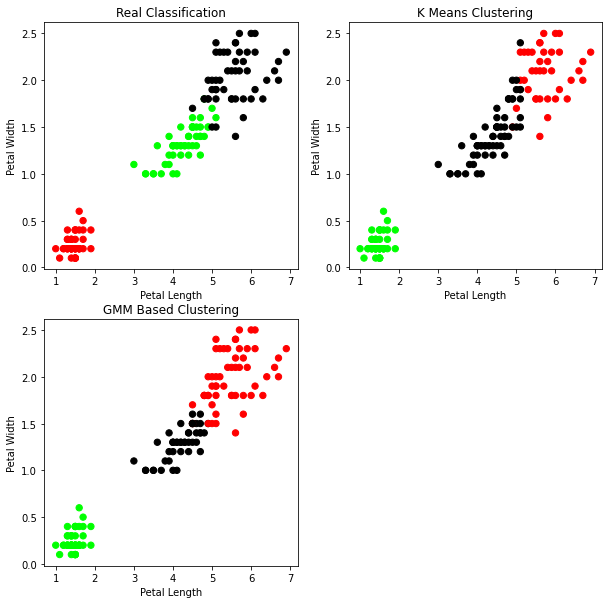

In [1]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np 
iris_dataset = pd.read_csv('iris.csv')
iris_dataset['Targets'] = iris_dataset.Class.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
X = iris_dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width' ] ]
Y = iris_dataset[['Targets']]
model = KMeans(n_clusters = 3)
model.fit(X)
print('Model Labels:\n', model.labels_ )
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xs = scaler.transform(X)
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
Y_gmm = gmm.predict(xs) 
print('GMM Labels:\n', Y_gmm) 
plt.figure(figsize = (10, 10))
colormap = np.array(['red', 'lime', 'black']) 
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets], s=40)
plt.title('Real Classification') 
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_], s=40)
plt.title('K Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width,c=colormap[Y_gmm], s=40)
plt.title('GMM Based Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
print('Evaluation of K-Means with Iris Dataset') 
print('Rand Index:%f ' % sm.adjusted_rand_score(Y.Targets, model.labels_ )) 
print('Homogenity Score:%f ' % sm.homogeneity_score(Y.Targets, model.labels_ ))
print('Completeness Score:%f ' % sm.completeness_score(Y.Targets, model.labels_ ))
print('V-Measure:%f ' % sm.v_measure_score(Y.Targets, model.labels_ ))
print('Evaluation of GMM with Iris Dataset') 
print('Rand Index:%f ' % sm.adjusted_rand_score(Y.Targets, Y_gmm)) 
print('Homogenity Score:%f ' % sm.homogeneity_score(Y.Targets, Y_gmm)) 
print('Completeness Score:%f ' % sm.completeness_score(Y.Targets, Y_gmm)) 
print('V-Measure:%f ' % sm.v_measure_score(Y.Targets, Y_gmm))